<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [4]:
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

# STEP ONE: write functions to extract information from scraped results

- We will need one function for each type of information that we want to take: locations, salaries, descriptions, company names and job titles.

In [23]:
#function to extract location

def extract_location_from_result():
    locations = []
    for result in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
        try:
            locations.append(result.find('span', attrs={'class':'location'}).text.strip())
        except:
            try:
                locations.append(result.find('div', attrs={'class':'location'}).text.strip())
            except:
                locations.append(np.nan)
    return locations

In [24]:
#function to extract salary

def extract_salary_from_result():
    salaries = []
    for result in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
        try:
            salaries.append(result.find('span', attrs={'class':'salaryText'}).text.strip())
        except:
            salaries.append(np.nan)
    return salaries

In [25]:
#function to extract description

def extract_description_from_result():
    descriptions = []
    for result in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
        try:
            descriptions.append(result.find('div', attrs={'class':'summary'}).text.strip())
        except:
            descriptions.append(np.nan)
    return descriptions

In [26]:
#function to extract title

def extract_title_from_result():
    titles = []
    for result in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
        try:
            titles.append(result.find('a', attrs = {'class': 'jobtitle', 'data-tn-element': 'jobTitle'}).text.strip())
        except:
            titles.append(np.nan) 
    return titles

In [27]:
#function to extract company name

def extract_company_from_result():
    companies = []
    for result in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
        try:
            companies.append(result.find('span', attrs={'class':'company'}).text.strip())
        except:
            companies.append(np.nan)    
    return companies

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

# STEP TWO: Strategy for web scraping

- We will scrape job listings for fifteen UK cities. 

- The list will feature the biggest cities by population, and also those we know to be tech hubs.

- The search will have a 25 mile radius around each city, so should cover the vast majority of relevant UK jobs.

- We will perform four searches for each city: Data Scientist, Machine Learning, Artificial Intelligence, and Data Analyst.

- It would be easy to loop through the fifteen cities, however it would be a headache if the website were to block us near the end of the loop. For that reason, we will manually adjust which city is being searched, saving the results from each one as we go.


In [217]:
#scraping indeed.co.uk for Data Scientist jobs.

import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time

from tqdm import tqdm

location = []
description = []
company = []
salary = []
title = []


# target cities and number of results from each city to be manually adjusted, so results can be saved as we go.

max_results_per_city = 300
cities = ['Birmingham', 'London', 'Manchester', 'Liverpool', 'Bristol', 'Brighton', 'Edinburgh', 'Leeds', 'Glasgow', 'Newcastle', 'Cardiff', 'Reading', 'Cambridge', 'Oxford', 'Southampton']

city = cities[0]
    
for x in tqdm(range(10, max_results_per_city, 10)):
    time.sleep(np.abs(np.random.normal(loc = 3, scale = 0.5)))
    url = 'https://www.indeed.co.uk/jobs?q=Data+Scientist&l={}&start={}'.format(city, x)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    title.extend(extract_title_from_result())
    salary.extend(extract_salary_from_result())
    location.extend(extract_location_from_result())
    description.extend(extract_description_from_result())
    company.extend(extract_company_from_result())
        
  

100%|██████████| 29/29 [01:42<00:00,  3.53s/it]


In [235]:
# dataframe to hold results from last city on list

southampton_ds = pd.DataFrame({'Company': company, 
                     'Location': location,
                     'Description': description,
                     'Salary': salary,
                     'Title': title})



In [220]:
# dataframes for each city's Data Scientist results, duplicates removed

birmingham_ds = birmingham_ds.drop_duplicates().reset_index(drop = True)
london_ds = london_ds.drop_duplicates().reset_index(drop = True)
manchester_ds = manchester_ds.drop_duplicates().reset_index(drop = True)
liverpool_ds = liverpool_ds.drop_duplicates().reset_index(drop = True)
bristol_ds = bristol_ds.drop_duplicates().reset_index(drop = True)
brighton_ds = brighton_ds.drop_duplicates().reset_index(drop = True)
edinburgh_ds = edinburgh_ds.drop_duplicates().reset_index(drop = True)
newcastle_ds = newcastle_ds.drop_duplicates().reset_index(drop = True)
leeds_ds = leeds_ds.drop_duplicates().reset_index(drop = True)
glasgow_ds = glasgow_ds.drop_duplicates().reset_index(drop = True)
cardiff_ds = cardiff_ds.drop_duplicates().reset_index(drop = True)
reading_ds = reading_ds.drop_duplicates().reset_index(drop = True)
cambridge_ds = cambridge_ds.drop_duplicates().reset_index(drop = True)
oxford_ds = oxford_ds.drop_duplicates().reset_index(drop = True)
southampton_ds = southampton_ds.drop_duplicates().reset_index(drop = True)

In [225]:
# combine all Data Scientist results into one dataframe, remove missing values

ds_jobs = pd.concat([birmingham_ds, london_ds, manchester_ds, liverpool_ds, bristol_ds, brighton_ds, edinburgh_ds, newcastle_ds, leeds_ds, glasgow_ds, cardiff_ds, reading_ds, cambridge_ds, oxford_ds, southampton_ds])
ds_jobs = ds_jobs.drop(columns = ['index'])
ds_jobs = ds_jobs.dropna()

In [350]:
# save all DataScientist results to csv

ds_jobs.to_csv(r'/Users/davidrhode/Desktop/GA/DSI15-lessons/project/project-4/ds_jobs.csv', index=False)

In [317]:
# Repeat the search for Machine Learning jobs

location = []
description = []
company = []
salary = []
title = []


max_results_per_city = 200
cities = ['Birmingham', 'London', 'Manchester', 'Liverpool', 'Bristol', 'Brighton', 'Edinburgh', 'Leeds', 'Glasgow', 'Newcastle', 'Cardiff', 'Reading', 'Cambridge', 'Oxford', 'Southampton']

city = cities[14]
    
for x in tqdm(range(10, max_results_per_city, 10)):
    time.sleep(np.abs(np.random.normal(loc = 3, scale = 0.5)))
    url = 'https://www.indeed.co.uk/jobs?q=machine+learning&l={}&start={}'.format(city, x)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    title.extend(extract_title_from_result())
    salary.extend(extract_salary_from_result())
    location.extend(extract_location_from_result())
    description.extend(extract_description_from_result())
    company.extend(extract_company_from_result())
        

100%|██████████| 19/19 [01:10<00:00,  3.74s/it]


In [319]:
# dataframe to hold results from last city on list

southampton_ml = pd.DataFrame({'Company': company, 
                     'Location': location,
                     'Description': description,
                     'Salary': salary,
                     'Title': title})

In [320]:
# dataframes for each city's Machine Learning results, duplicates removed

birmingham_ml = birmingham_ml.drop_duplicates().reset_index(drop = True)
london_ml = london_ml.drop_duplicates().reset_index(drop = True)
manchester_ml = manchester_ml.drop_duplicates().reset_index(drop = True)
liverpool_ml = liverpool_ml.drop_duplicates().reset_index(drop = True)
bristol_ml = bristol_ml.drop_duplicates().reset_index(drop = True)
brighton_ml = brighton_ml.drop_duplicates().reset_index(drop = True)
edinburgh_ml = edinburgh_ml.drop_duplicates().reset_index(drop = True)
leeds_ml = leeds_ml.drop_duplicates().reset_index(drop = True)
glasgow_ml = glasgow_ml.drop_duplicates().reset_index(drop = True)
newcastle_ml = newcastle_ml.drop_duplicates().reset_index(drop = True)
reading_ml = reading_ml.drop_duplicates().reset_index(drop = True)
cardiff_ml = cardiff_ml.drop_duplicates().reset_index(drop = True)
cambridge_ml = cambridge_ml.drop_duplicates().reset_index(drop = True)
oxford_ml = oxford_ml.drop_duplicates().reset_index(drop = True)
southampton_ml = southampton_ml.drop_duplicates().reset_index(drop = True)

In [322]:
# combine all Machine Learning results into one dataframe, remove missing values
ml_jobs = pd.concat([birmingham_ml, london_ml, manchester_ml, liverpool_ml, bristol_ml, brighton_ml, edinburgh_ml, newcastle_ml, leeds_ml, glasgow_ml, cardiff_ml, reading_ml, cambridge_ml, oxford_ml, southampton_ml]).reset_index(drop = True)
ml_jobs = ml_jobs.dropna()

In [348]:
# save Machine Learning results to csv
ml_jobs.to_csv(r'/Users/davidrhode/Desktop/GA/DSI15-lessons/project/project-4/ml_jobs.csv', index=False)

In [416]:
# Repeat the search for Artificial Intelligence jobs

location = []
description = []
company = []
salary = []
title = []


max_results_per_city = 300
cities = ['Birmingham', 'London', 'Manchester', 'Liverpool', 'Bristol', 'Brighton', 'Edinburgh', 'Leeds', 'Glasgow', 'Newcastle', 'Cardiff', 'Reading', 'Cambridge', 'Oxford', 'Southampton']

city = cities[14]
    
for x in tqdm(range(10, max_results_per_city, 10)):
    time.sleep(np.abs(np.random.normal(loc = 3, scale = 0.5)))
    url = 'https://www.indeed.co.uk/jobs?q=artificial+intelligence&l={}&start={}'.format(city, x)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    title.extend(extract_title_from_result())
    salary.extend(extract_salary_from_result())
    location.extend(extract_location_from_result())
    description.extend(extract_description_from_result())
    company.extend(extract_company_from_result())

100%|██████████| 29/29 [01:45<00:00,  3.64s/it]


In [418]:
# dataframe to hold results from last city on list

southampton_ai = pd.DataFrame({'Company': company, 
                     'Location': location,
                     'Description': description,
                     'Salary': salary,
                     'Title': title})

In [419]:
# dataframes for each city's Artificial Intelligence results, duplicates removed

london_ai = london_ai.drop_duplicates().reset_index(drop = True)
birmingham_ai = birmingham_ai.drop_duplicates().reset_index(drop = True)
manchester_ai = manchester_ai.drop_duplicates().reset_index(drop = True)
liverpool_ai = liverpool_ai.drop_duplicates().reset_index(drop = True)
bristol_ai = bristol_ai.drop_duplicates().reset_index(drop = True)
brighton_ai = brighton_ai.drop_duplicates().reset_index(drop = True)
edinburgh_ai = edinburgh_ai.drop_duplicates().reset_index(drop = True)
leeds_ai = leeds_ai.drop_duplicates().reset_index(drop = True)
glasgow_ai = glasgow_ai.drop_duplicates().reset_index(drop = True)
newcastle_ai = newcastle_ai.drop_duplicates().reset_index(drop = True)
cardiff_ai = cardiff_ai.drop_duplicates().reset_index(drop = True)
reading_ai = reading_ai.drop_duplicates().reset_index(drop = True)
cambridge_ai = cambridge_ai.drop_duplicates().reset_index(drop = True)
oxford_ai = oxford_ai.drop_duplicates().reset_index(drop = True)
southampton_ai = newcastle_ai.drop_duplicates().reset_index(drop = True)

In [421]:
# combine all Artificial Intelligence results into one dataframe, remove missing values
ai_jobs = pd.concat([birmingham_ai, london_ai, manchester_ai, liverpool_ai, bristol_ai, brighton_ai, edinburgh_ai, newcastle_ai, leeds_ai, glasgow_ai, cardiff_ai, reading_ai, cambridge_ai, oxford_ai, southampton_ai]).reset_index(drop = True)
ai_jobs = ai_jobs.dropna()

In [428]:
# save all Artificial Intelligence results to csv
ai_jobs.to_csv(r'/Users/davidrhode/Desktop/GA/DSI15-lessons/project/project-4/ai_jobs.csv', index=False)

In [502]:
# Repeat the search for Data Analyst jobs

location = []
description = []
company = []
salary = []
title = []


max_results_per_city = 200
cities = ['Birmingham', 'London', 'Manchester', 'Liverpool', 'Bristol', 'Brighton', 'Edinburgh', 'Leeds', 'Glasgow', 'Newcastle', 'Cardiff', 'Reading', 'Cambridge', 'Oxford', 'Southampton']

city = cities[14]
    
for x in tqdm(range(10, max_results_per_city, 10)):
    time.sleep(np.abs(np.random.normal(loc = 3, scale = 0.5)))
    url = 'https://www.indeed.co.uk/jobs?q=data+analyst&l={}&start={}'.format(city, x)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    title.extend(extract_title_from_result())
    salary.extend(extract_salary_from_result())
    location.extend(extract_location_from_result())
    description.extend(extract_description_from_result())
    company.extend(extract_company_from_result())

100%|██████████| 19/19 [01:11<00:00,  3.75s/it]


In [504]:
# dataframe to hold results from last city on list

southampton_da = pd.DataFrame({'Company': company, 
                     'Location': location,
                     'Description': description,
                     'Salary': salary,
                     'Title': title})

In [505]:
# dataframes for each city's Data Analyst results, duplicates removed

birmingham_da = birmingham_da.drop_duplicates().reset_index(drop = True)
london_da = london_da.drop_duplicates().reset_index(drop = True)
manchester_da = manchester_da.drop_duplicates().reset_index(drop = True)
liverpool_da = liverpool_da.drop_duplicates().reset_index(drop = True)
bristol_da = bristol_da.drop_duplicates().reset_index(drop = True)
brighton_da = brighton_da.drop_duplicates().reset_index(drop = True)
edinburgh_da = edinburgh_da.drop_duplicates().reset_index(drop = True)
leeds_da = leeds_da.drop_duplicates().reset_index(drop = True)
glasgow_da = glasgow_da.drop_duplicates().reset_index(drop = True)
newcastle_da = newcastle_da.drop_duplicates().reset_index(drop = True)
cardiff_da = cardiff_da.drop_duplicates().reset_index(drop = True)
reading_da = reading_da.drop_duplicates().reset_index(drop = True)
cambridge_da = cambridge_da.drop_duplicates().reset_index(drop = True)
oxford_da = oxford_da.drop_duplicates().reset_index(drop = True)
southampton_da = southampton_da.drop_duplicates().reset_index(drop = True)

In [507]:
# combine all Data Analyst results into one dataframe, remove missing values
da_jobs = pd.concat([birmingham_da, london_da, manchester_da, liverpool_da, bristol_da, brighton_da, edinburgh_da, newcastle_da, leeds_da, glasgow_da, cardiff_da, reading_da, cambridge_da, oxford_da, southampton_da]).reset_index(drop = True)
da_jobs = da_jobs.dropna()

In [511]:
# save Data Analyst results to csv
da_jobs.to_csv(r'/Users/davidrhode/Desktop/GA/DSI15-lessons/project/project-4/da_jobs.csv', index=False)

In [512]:
# combine results for the four different searches, 1947 results in total
all_jobs = pd.concat([ds_jobs, da_jobs, ai_jobs, ml_jobs]).reset_index(drop = True)

In [516]:
# drop duplicates (some jobs will have shown up in more than one section), leaving 1736 results
all_jobs = all_jobs.drop_duplicates()

In [520]:
# save all jobs to csv
all_jobs.to_csv(r'/Users/davidrhode/Desktop/GA/DSI15-lessons/project/project-4/all_jobs.csv', index=False)

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns. Lastly, we need to clean up salary data. 



1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

# STEP THREE: Data cleaning 

- So far we have dropped all the duplicates and the results that have missing salary data.
- We are only interested in jobs with annual salaries, not ones that pay daily or weekly
- We need to clean the data in the 'Salary' column and convert it to the correct dtype
- We need to remove the postcodes that are attached to a handful of locations
- We need to make the locations consistent by renaming many of them (eg Newcastle Upon Tyne is the same as Newcastle)
- We need to remove some non-data jobs that have been incorrectly returned (solicitors for example).


In [23]:
# read in data for all jobs. 
all_jobs = pd.read_csv('all_jobs.csv')

In [24]:
#So far, the missing values have been dropped and so have duplicates.

print(f'all_jobs dataframe contains {all_jobs.duplicated().sum()} duplicates')
print(f'all_jobs dataframe contains {all_jobs.isna().sum().sum()} null values')

all_jobs dataframe contains 0 duplicates
all_jobs dataframe contains 0 null values


In [25]:
#create new dataframe, annual jobs, to contain only those jobs with annual salary (1551 rows)

year_filter = all_jobs['Salary'].str.contains('year')
annual_jobs = all_jobs.loc[year_filter, :]

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [26]:
# function to clean salary column

def convert_to_single_number(string_series):
    clean_string = string_series.str.replace('£', '').str.replace(',', '').str.rstrip('a year')
    split_string = clean_string.apply(lambda x: x.split('-'))
    first_num = split_string.apply(lambda x: pd.to_numeric(x[0]))
    last_num = split_string.apply(lambda x: pd.to_numeric(x[-1]))
    return (last_num + first_num) / 2


In [27]:
#clean salary column

annual_jobs['Salary'] = convert_to_single_number(annual_jobs['Salary'])

/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
annual_jobs['Salary'].dtype

dtype('float64')

In [29]:
annual_jobs['Salary'].head()

0    44750.0
2    60000.0
3    29000.0
4    45000.0
5    70000.0
Name: Salary, dtype: float64

**It would also be helpful to clean up the 'Location' column. There are over a dozen locations that are seemingly unique due to having postcode information (missing from the vast majority of entries). We can remove these to clean up the data.**

In [58]:
# examples of postcodes attached to small percentage of locations

annual_jobs['Location'].value_counts().tail(3)

Manchester M12 6JH    1
Windsor               1
Redhill RH1 1PR       1
Name: Location, dtype: int64

In [54]:
# create a regular expression to remove the postcodes
import re
pattern = r'([A-Z][A-Z0-9]{0,1})([A-Z0-9]{0,2}) {0,}(([0-9])([A-Z]{0,2}))'


In [61]:
# remove postcodes
annual_jobs['Location'] = annual_jobs['Location'].str.replace(pattern, '')

/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
# confirm postcodes have been removed
annual_jobs['Location'].value_counts().tail(3)

Dunfermline             1
East Croydon Station    1
South West              1
Name: Location, dtype: int64

In [188]:
annual_jobs['Location'] = annual_jobs['Location'].str.strip()

There are a couple more data cleaning jobs to do before we move forward with modelling. Some of the 'Location' entries are inconsistent - most of them are major towns/cities, but some of them are districts within these towns. For example, 'Covent Garden' is an area in central London, and should be replaced with 'London'.

Also, Indeed has incorrectly shown us some jobs that aren't connected with data, but are related to the legal profession.

In [191]:
# create mapping dictionary for locations

location_mapping_dict = {'Sutton': 'London', 'Colindale': 'London', 'Brentford': 'London', 'West Drayton': 'London', 'East London': 'London', 'North London': 'London', 'West London': 'London', 'Uxbridge': 'London', 'Covent Garden': 'London', 'South Kensington': 'London', 'Newcastle upon Tyne': 'Newcastle', 'Ealing': 'London', 'South London': 'London', 'London Bridge Station': 'London', 'Heathrow': 'London', 'Hammersmith': 'London', 'Tooting': 'London', 'Greater London': 'London', 'Dartford': 'London', 'Canary Wharf': 'London', 'West End': 'London', 'Richmond': 'London', 'Twickenham': 'London', 'Salford Quays': 'Salford', 'Portishead': 'Bristol', 'Brighton and Hove': 'Brighton', 'Paddington': 'London', 'Teddington': 'London', 'Hove': 'Brighton', 'Hendon': 'London', 'University of Warwick': 'Warwick', 'University of York': 'York'}

In [195]:
# clean up location values

annual_jobs['Location'] = annual_jobs['Location'].replace(location_mapping_dict)

In [59]:
# create boolean filter for rows that are not relevant to data jobs

law = annual_jobs['Title'].str.contains('Law')
solicitor = annual_jobs['Title'].str.contains('Solicitor')
lawyer = annual_jobs['Title'].str.contains('Lawyer')
accountant = annual_jobs['Title'].str.contains('Accountant')
designer = annual_jobs['Title'].str.contains('UX Designer')

disallowed = law | solicitor | lawyer | accountant | designer

In [64]:
# drop irrelevant rows

annual_jobs = annual_jobs.loc[~disallowed]

### Save your results as a CSV

In [284]:
# save cleaned dataset to csv
annual_jobs.to_csv(r'/Users/davidrhode/Desktop/GA/DSI15-lessons/project/project-4/annual_jobs.csv', index=False)

### Load in the the data of scraped salaries

In [4]:
import pandas as pd
annual_jobs = pd.read_csv('annual_jobs.csv')

In [67]:
annual_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1550
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1545 non-null   object 
 1   Location     1545 non-null   object 
 2   Description  1545 non-null   object 
 3   Salary       1545 non-null   float64
 4   Title        1545 non-null   object 
dtypes: float64(1), object(4)
memory usage: 72.4+ KB


### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

# STEP FOUR: Preparing to model the newly-cleaned data

- The data is now clean and ready to be modelled
- As we are carrying out a classification task, we need to split the target variable into two classes
- We need to examine the split point, and calculate a baseline figure.


In [68]:
# check median salary

annual_jobs['Salary'].median()

45000.0

In [69]:
# less than 48% have a salary greater than the median, which seems strange
(annual_jobs['Salary'] > 45000).mean()

0.47896440129449835

In [70]:
# it turns out this is because no less than 75 jobs have a salary exactly equal to the median
# since this group can't be separated, it's impossible for us to split the data into two categories of exactly 50% each.

(annual_jobs['Salary'] == 45000).sum()

75

In [71]:
# add a new column to the dataframe, a binary variable that is '1' for salaries above the median and 0 otherwise.

annual_jobs['high_salary'] = (annual_jobs['Salary'] > annual_jobs['Salary'].median()) * 1
annual_jobs['high_salary']

/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       0
1       1
2       0
3       0
4       1
       ..
1546    1
1547    1
1548    0
1549    0
1550    1
Name: high_salary, Length: 1545, dtype: int64

#### Thought experiment: What is the baseline accuracy for this model?

In [6]:
#the baseline accuracy is a fraction over 52%

annual_jobs['high_salary'].value_counts(normalize = True)

0    0.521036
1    0.478964
Name: high_salary, dtype: float64

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import scipy


In [9]:
# our first model will only use the 'Location' column as a predictor, which needs to be dummified
X = annual_jobs['Location']
y = annual_jobs['high_salary']
X = pd.get_dummies(X, drop_first = True)

#split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    stratify = y, random_state = 1)

# STEP FIVE: A basic model based on only one feature 

- We have been asked to start out with only one feature, 'Location'.
- We will start by trying Logistic Regression, the results have the benefit of being easily explainable to a lay audience. 
- Afterwards we can try an ensemble model to see if we can improve on the score.

In [ ]:
#instantiate logistic regression model

lr = LogisticRegression(verbose = 1, max_iter = 1000)


# create a search grid for parameters to tune

params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

# instantiate GridSearch object and fit it to training data

gs_lr = GridSearchCV(estimator = lr,
                  param_grid = params,
                  cv = 5,
                  scoring = 'accuracy',
                  verbose = 1)

gs_lr.fit(X_train, y_train)

In [78]:
#cross validated scores are well above baseline (which is about 52%)

print('cross validated score:', gs_lr.best_score_)
print('test score:', gs_lr.score(X_test, y_test))
print('best grid search params:', gs_lr.best_params_)

cross validated score: 0.6617800705237038
test score: 0.6181229773462783
best grid search params: {'C': 100000.0, 'fit_intercept': True, 'penalty': 'l2'}


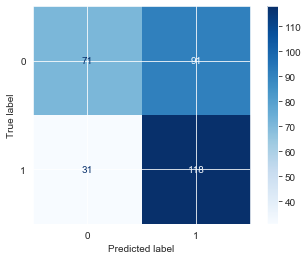

In [29]:
# confusion matrix for test set (first logistic regression model, only one feature)

plot_confusion_matrix(gs_lr, X_test, y_test, cmap=plt.cm.Blues);

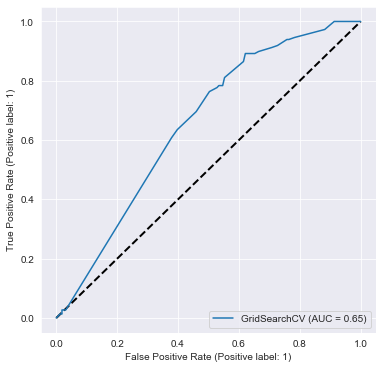

In [80]:
#plot roc curve on test set for logistic regression

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
plot_roc_curve(gs_lr, X_test, y_test, ax = ax)
plt.show()

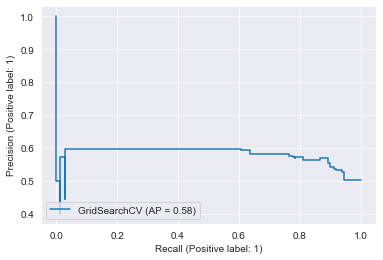

In [81]:
# precision-recall curve for logistic regression on test set

plot_precision_recall_curve(gs_lr, X_test, y_test);

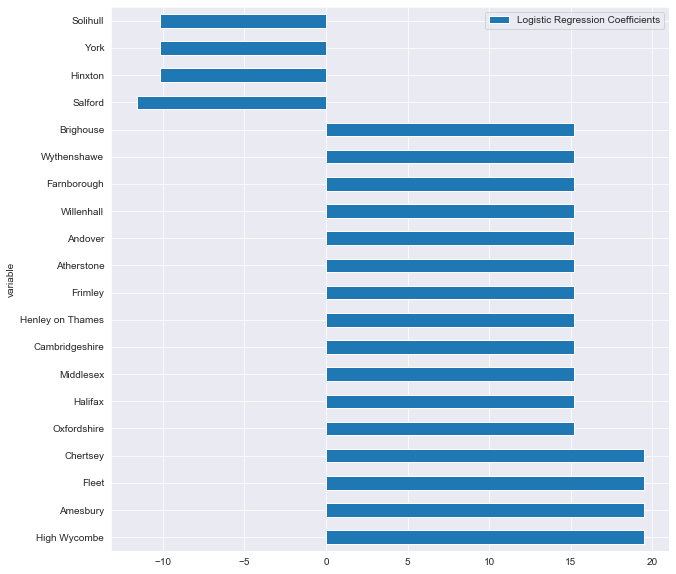

In [82]:
# with over 200 dummified features it will be cumbersome to plot all the model coefficients so we will extract the twenty most significant to visualise

coefs_lr = pd.DataFrame({
    'coef': gs_lr.best_estimator_.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(gs_lr.best_estimator_.coef_[0])
})

top_twenty = coefs_lr.sort_values('abscoef', ascending=False).head(20)
top_twenty.plot(kind='barh', x='variable', y='coef',
                       figsize=(10, 10), label='Logistic Regression Coefficients')
plt.show()

In [10]:
# instantiate RandomForest model, grid search and fit to training data

rf = RandomForestClassifier(n_jobs = -2, verbose = 1)

rf_params = {'n_estimators' : [500], 
            'max_features' : [0.6, 0.8, 1.0]}

gs_rf = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv = 5,
                     scoring = 'accuracy',
                     n_jobs = -2,
                     verbose = 1)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  15 out of  15 | elapsed:   23.4s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-2, verbose=1),
             n_jobs=-2,
             param_grid={'max_features': [0.6, 0.8, 1.0],
                         'n_estimators': [500]},
             scoring='accuracy', verbose=1)

In [84]:
#cross validated scores are almost exactly the same as for best Logistic Regression model, well above baseline (which is about 52%)

print('cross validated score:', gs_rf.best_score_)
print('test score:', gs_rf.score(X_test, y_test))
print('best grid search params:', gs_rf.best_params_)

cross validated score: 0.6601606373253233


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s


test score: 0.6181229773462783
best grid search params: {'max_features': 0.6, 'n_estimators': 500}


[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


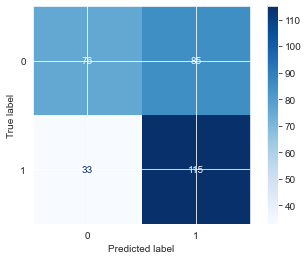

In [11]:
# confusion matrix for best Random Forest on test set (one feature only, Location)

plot_confusion_matrix(gs_rf, X_test, y_test, cmap=plt.cm.Blues);

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


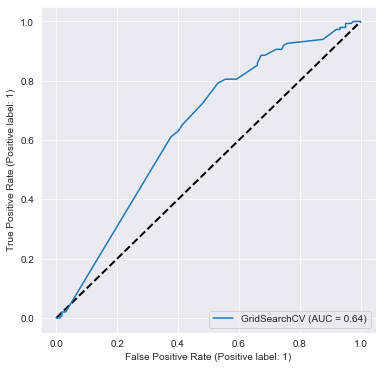

In [52]:
#plot roc curve on test set for best random forest

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
plot_roc_curve(gs_rf, X_test, y_test, ax = ax)
plt.show()

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


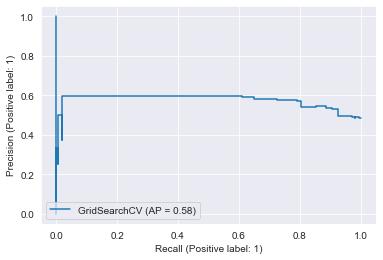

In [53]:
# precision-recall curve for Random Forest on test set

plot_precision_recall_curve(gs_rf, X_test, y_test);

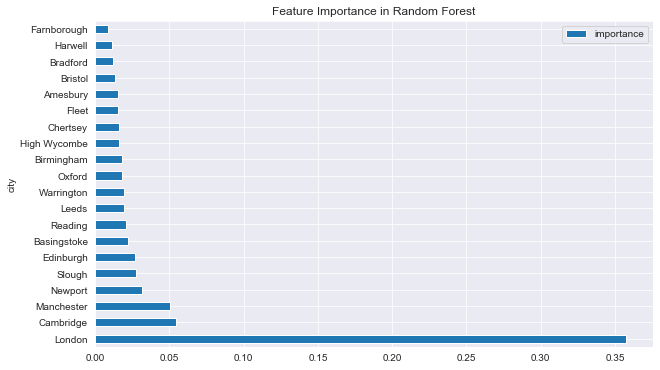

In [57]:
#as for Logistic Regression, it will be too cumbersome to visualise all significance of all the features for Random Forest
# again we will pull out the twenty most important for plotting

rf_features = pd.DataFrame(list(zip(X_train.columns, gs_rf.best_estimator_.feature_importances_)), columns = ['city', 'importance'])
rf_top_twenty = rf_features.sort_values(by = 'importance', ascending = False).head(20)
rf_top_twenty.plot(kind = 'barh', x = 0, y = 1, figsize = (10, 6), title = 'Feature Importance in Random Forest')
plt.show()

# STEP SIX: Assessing the two 'one-feature' models

- The LogisticRegression and RandomForest models have a very similar cross val score (about 0.66, which is significantly above the baseline figure of 0.52)
- As there is only one feature, inevitably the coefs for the LogisticRegression and the feature_importances for the RandomForest are all geographical. 
- However the different nature of the two algorithms means that we see different cities appearing in the two lists.
- The confusion matrices, ROC curves and Precision-Recall curves are very similar for the two models.

# STEP SEVEN: Feature engineering

- This step can be broken into two parts. 
- The first part will be engineering new features from the 'Company' and 'Title' columns.
- The second part will be Vectorising the text in the 'Description' column to see if we can make further improvements.




-Over 300 job titles inlude an indication of seniority (eg 'Senior', 'Head' 'Director',or 'Lead')
-There are over 100 titles that include a suggestion of junior status ('Junior', 'Apprentice', 'Apprenticeship', 'Associate', 'PhD')
-Academic institutions tend to pay less than companies with a commercial focus - there are some entries in the ['Company'] column that contain 'University'
-'Data Analyst' is often a stepping stone to a role in machine learning - we can create an 'analyst' feature.
-'Machine Learning' seems to be associated with seniority, very few if any entry level positions.

In [104]:
# create a new feature linked to seniority in job titles

director = annual_jobs['Title'].str.contains('Director')
manager = annual_jobs['Title'].str.contains('Manager')
executive = annual_jobs['Title'].str.contains('Executive')
senior = annual_jobs['Title'].str.contains('Senior')
lead = annual_jobs['Title'].str.contains('Lead')
head = annual_jobs['Title'].str.contains('Head')
vp = annual_jobs['Title'].str.contains('VP')
chief = annual_jobs['Title'].str.contains('Chief')
principal = annual_jobs['Title'].str.contains('Principal')

senior_jobs = director | manager | executive | senior | lead | head | vp | chief | principal

annual_jobs['senior'] = senior_jobs * 1


/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [111]:
# create a new feature linked to junior status in job titles

junior = annual_jobs['Title'].str.contains('Junior') 
apprentice = annual_jobs['Title'].str.contains('Apprentice') 
apprenticeship = annual_jobs['Title'].str.contains('Apprenticeship')
phd = annual_jobs['Title'].str.contains('PhD')
intern = annual_jobs['Title'].str.contains('Intern')

junior_jobs = junior | apprentice | apprenticeship | phd | intern
annual_jobs['junior'] = junior_jobs * 1

/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [112]:
# often accademic roles are underpaid relative to similar roles in business
# create a new 'academic' feature

academic = annual_jobs['Company'].str.contains('University')
annual_jobs['academic'] = academic * 1

/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [217]:
# a quick examination of salaries by role suggests that 'Machine Learning Engineer' is rarely an entry level position

annual_jobs['machine_learning'] = annual_jobs['Title'].str.contains('Machine Learning') * 1


/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [262]:
# Likewise, a scan of salaries by role suggests that 'Data Analyst' positions are often (not always) quite junior

annual_jobs['analyst'] = annual_jobs['Title'].str.contains('Data Analyst') * 1


/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
annual_jobs.head(1)

,Company,Location,Description,Salary,Title,high_salary,senior,junior,academic,machine_learning,analyst
0,Xoserve,Solihull,Knowledge of data analysis with hands on exper...,44750.0,Data Science Lead,0,1,0,0,0,0


# STEP EIGHT: Build models with multiple features

- The next step is to try the same two models (LogisticRegression, RandomForest) with the new features that we have engineered.
- We can then go on to extract further features from the 'Description' column.


In [222]:
# Again we will start with a logistic regression model, this time we will use the new features we engineered as well as 'Location' and 'Company'

X = annual_jobs[['Company', 'Location', 'Title', 'senior', 'junior', 'academic', 'machine_learning', 'analyst']]
y = annual_jobs['high_salary']
X = pd.get_dummies(X, drop_first = True)


lr = LogisticRegression(n_jobs = -2, verbose = 1, max_iter = 1000)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    stratify = y, random_state = 1)


params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs_lr_2 = GridSearchCV(estimator = lr,
                  param_grid = params,
                  cv = 5,
                  scoring = 'accuracy',
                  n_jobs = -2,
                  verbose = 1)

gs_lr_2.fit(X_train, y_train)


print('cross validated score:', gs_lr_2.best_score_)
print('test score:', gs_lr_2.score(X_test, y_test))
print('best grid search params:', gs_lr_2.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.52103631        nan 0.66988703        nan 0.52103631
        nan 0.66988703        nan 0.52103631        nan 0.66988703
        nan 0.63593444        nan 0.67069348        nan 0.71844717
        nan 0.6779744         nan 0.71519851        nan 0.70549824
        nan 0.75972313        nan 0.74027361        nan 0.77589461
        nan 0.77589134        nan 0.78803056        nan 0.78317553
        nan 0.78075617        nan 0.77670759        nan 0.7759142
        nan 0.76862348        nan 0.77024291        nan 0.76215228
        nan 0.76538462        nan 0.7613393         nan 0.76619433
        nan 0.75486483        nan 0.76214901        nan 0.75163249]
  category=UserWarning
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


cross validated score: 0.7880305602716469
test score: 0.8511326860841424
best grid search params: {'C': 5.1794746792312125, 'fit_intercept': True, 'penalty': 'l2'}


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    3.8s finished


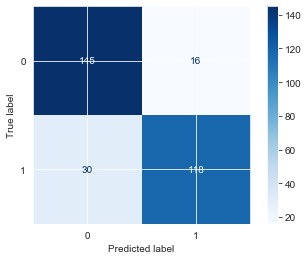

In [223]:
# confusion matrix for test set (logistic regression model with multiple features)

plot_confusion_matrix(gs_lr_2, X_test, y_test, cmap=plt.cm.Blues);


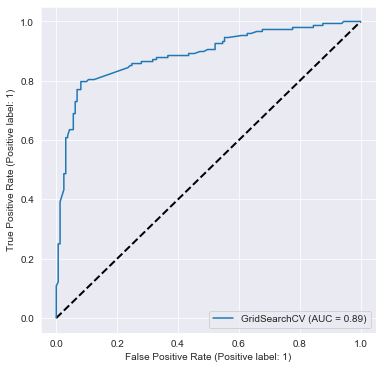

In [224]:
#plot roc curve on test set for logistic regression with multiple features

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
plot_roc_curve(gs_lr_2, X_test, y_test, ax = ax)
plt.show()

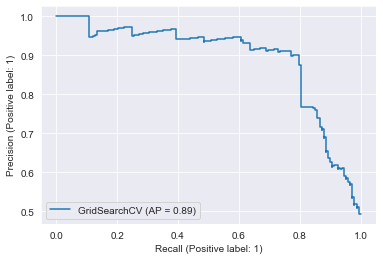

In [225]:
# precision-recall curve for logistic regression on test set (multiple features)

plot_precision_recall_curve(gs_lr_2, X_test, y_test);

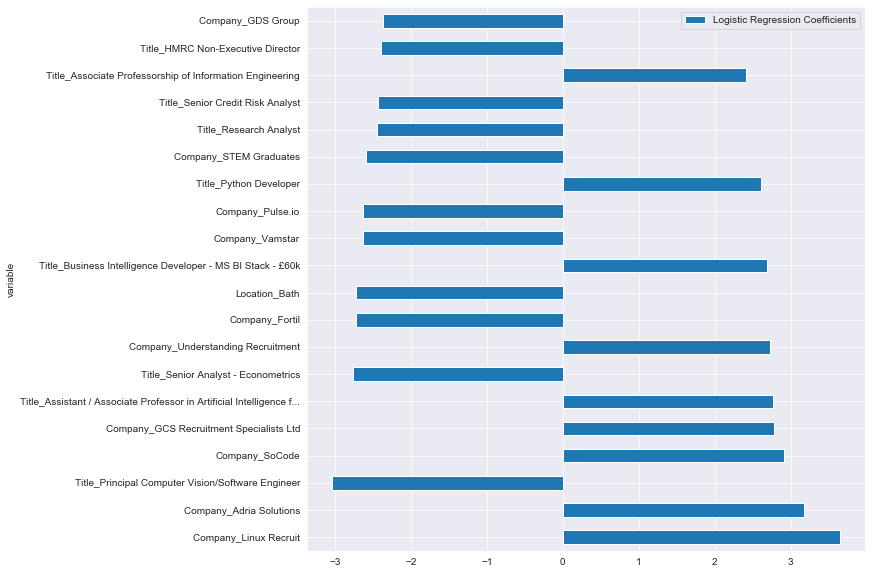

In [226]:
# with many dummified features it will be cumbersome to plot all the model coefficients so we will extract the twenty most significant to visualise

coefs_lr = pd.DataFrame({
    'coef': gs_lr_2.best_estimator_.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(gs_lr_2.best_estimator_.coef_[0])
})

top_twenty = coefs_lr.sort_values('abscoef', ascending=False).head(20)
top_twenty.plot(kind='barh', x='variable', y='coef',
                       figsize=(10, 10), label='Logistic Regression Coefficients')
plt.show()

Previously when we worked with only one feature, there was very little to choose between logistic regression and random forest. Now we are working with multiple features we can now test to see if RF offers any improvement.


In [227]:
rf = RandomForestClassifier(n_jobs = -2, verbose = 1)

rf_params = {'n_estimators' : [500], 
            'max_features' : [0.6, 0.8, 1.0]}

gs_rf_2 = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv = 5,
                     scoring = 'accuracy',
                     n_jobs = -2,
                     verbose = 1)

gs_rf_2.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:    9.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-2, verbose=1),
             n_jobs=-2,
             param_grid={'max_features': [0.6, 0.8, 1.0],
                         'n_estimators': [500]},
             scoring='accuracy', verbose=1)

In [228]:
print('cross validated score:', gs_rf_2.best_score_)
print('test score:', gs_rf_2.score(X_test, y_test))
print('best grid search params:', gs_rf_2.best_params_)

cross validated score: 0.7815691524095598


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s


test score: 0.7993527508090615
best grid search params: {'max_features': 0.6, 'n_estimators': 500}


[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


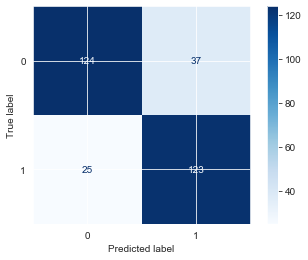

In [229]:
# confusion matrix for best Random Forest on test set

plot_confusion_matrix(gs_rf_2, X_test, y_test, cmap=plt.cm.Blues);

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


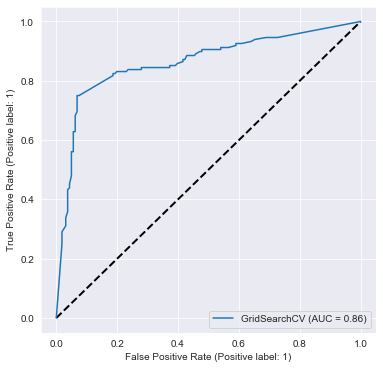

In [230]:
#plot roc curve on test set for best random forest

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
plot_roc_curve(gs_rf_2, X_test, y_test, ax = ax)
plt.show()

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


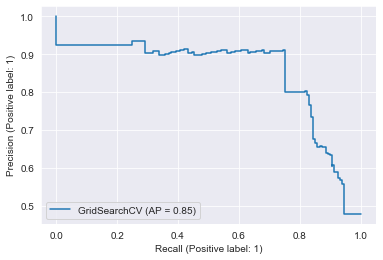

In [232]:
# precision-recall curve for Random Forest on test set

plot_precision_recall_curve(gs_rf_2, X_test, y_test);

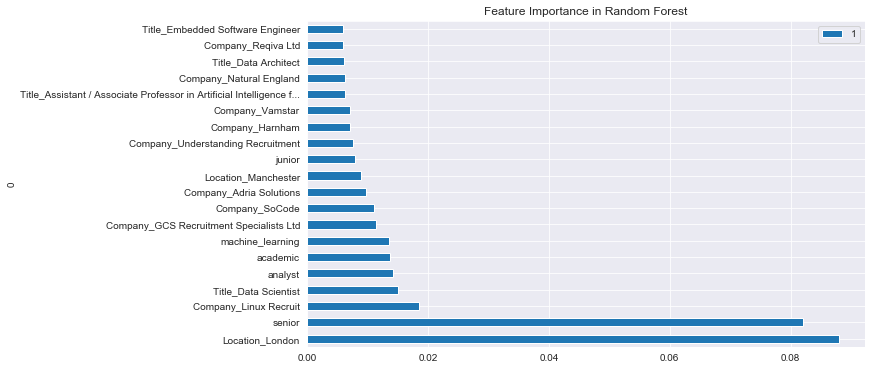

In [233]:
#as for Logistic Regression, it will be too cumbersome to visualise all significance of all the features for Random Forest
# again we will pull out the twenty most important for plotting

rf_features = pd.DataFrame(list(zip(X_train.columns, gs_rf_2.best_estimator_.feature_importances_)))
rf_top_twenty = rf_features.sort_values(by = 1, ascending = False).head(20)
rf_top_twenty.plot(kind = 'barh', x = 0, y = 1, figsize = (10, 6), title = 'Feature Importance in Random Forest')
plt.show()

# STEP NINE: Summarise the two multi-feature models 

- The feature engineering has provided a big boost to both the LogisticRegression and RandomForest models.
- LR now scores 0.788 on cross validation, and RF now scores 0.781.
- LR does significantly better on the test set, and so has a slightly better looking ROC curve and Precision-Recall Curve (we chose to plot these against the test set).
- The most significant LR model coefs are almost all based on 'Company' and 'Job Title', there is only one 'Location' in the top twenty.
- The RF model has feature_importances that include the features we engineered for 'senior', 'junior', 'academic', and 'analyst'.

# STEP TEN: Vectorise text in 'Description' column to create new features

- We have made big gains from engineering simple features from 'Title' and 'Company' columns. 
- The next step is to vectorise the text in the 'Description' column, to see if we can create new features that will offer further gains.


In [137]:
from scipy import sparse
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [138]:
annual_jobs.head(1)

,Company,Location,Description,Salary,Title,high_salary,senior,junior,academic
0,Xoserve,Solihull,Knowledge of data analysis with hands on exper...,44750.0,Data Science Lead,0,1,0,0


In [235]:
tfidvec = TfidfVectorizer(ngram_range = (1, 2), stop_words = 'english')
one_hot = OneHotEncoder(sparse=False, drop=None, handle_unknown='ignore')
scaler = StandardScaler(with_mean=False)

In [244]:
col_trans = ColumnTransformer([('corpus', tfidvec, 'Description'), 
                               ('categories', one_hot, ['Company', 'Location', 'Title', 'senior', 'junior', 'academic', 'machine_learning', 'analyst']),
                               ], 
                              remainder='passthrough', 
                             sparse_threshold=0.6) 

In [245]:
cmat = col_trans.fit_transform(annual_jobs)
cmat

<1545x18763 sparse matrix of type '<class 'numpy.float64'>'
	with 55950 stored elements in Compressed Sparse Row format>

In [246]:
col_trans.named_transformers_['corpus'].get_feature_names()[-10:]

['years working',
 'young',
 'young agile',
 'young sme',
 'yoy',
 'yoy trail',
 'zero',
 'zero building',
 'zuse',
 'zuse talent']

# STEP ELEVEN: Create a pipeline including all features, logistic regression model



In [247]:
lr_3 = LogisticRegression(n_jobs = -2, verbose = 1, max_iter = 1000)

X = annual_jobs[['Company', 'Location', 'Title','senior', 'junior', 'academic', 'Description', 'machine_learning', 'analyst']]
y = annual_jobs['high_salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    stratify = y, random_state = 1)


pipe = make_pipeline(col_trans, scaler, lr_3)


In [248]:
pipe.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.4s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.6,
                                   transformers=[('corpus',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'Description'),
                                                 ('categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Company', 'Location',
                                                   'Title', 'senior', 'junior',
                                                   'academic',
                

In [249]:
print('cross val score:' , cross_val_score(pipe, X_train, y_train, cv=5).mean())
print('test set score:', pipe.score(X_test, y_test))

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


cross val score: 0.7345990596839493
test set score: 0.7443365695792881


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.2s finished


# STEP TWELVE: Assess pipeline performance and adjust

- Unfortunately the cross val score has gone down relative to our earlier models - the NLP work has had a negative effect. 

- So far, the only parameters we tried were stop_words and ngram_range. It may be that setting a max_df might help.

In [252]:
tfidvec_2 = TfidfVectorizer(ngram_range = (1, 2), stop_words = 'english', max_df = 0.5)
one_hot = OneHotEncoder(sparse=False, drop=None, handle_unknown='ignore')
scaler = StandardScaler(with_mean=False)

col_trans_2 = ColumnTransformer([('corpus', tfidvec_2, 'Description'), 
                               ('categories', one_hot, ['Company', 'Location', 'Title', 'senior', 'junior', 'academic', 'machine_learning', 'analyst']),
                               ], 
                              remainder='passthrough', 
                             sparse_threshold=0.6) 

In [253]:
cmat_2 = col_trans_2.fit_transform(annual_jobs)
cmat_2

<1545x18762 sparse matrix of type '<class 'numpy.float64'>'
	with 55087 stored elements in Compressed Sparse Row format>

In [254]:
lr_3 = LogisticRegression(n_jobs = -2, verbose = 1, max_iter = 1000)

X = annual_jobs[['Company', 'Location', 'Title','senior', 'junior', 'academic', 'Description', 'machine_learning', 'analyst']]
y = annual_jobs['high_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

pipe_2 = make_pipeline(col_trans_2, scaler, lr_3)


In [255]:
pipe_2.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.4s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.6,
                                   transformers=[('corpus',
                                                  TfidfVectorizer(max_df=0.5,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'Description'),
                                                 ('categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Company', 'Location',
                                                   'Title', 'senior', 'junior',
 

In [256]:
print('cross val score:' , cross_val_score(pipe_2, X_train, y_train, cv=5).mean())
print('test set score:', pipe_2.score(X_test, y_test))

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


cross val score: 0.7370282094815201
test set score: 0.7443365695792881


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.3s finished


# STEP THIRTEEN: Drop vectorised data taken from 'Description' column and experiment with further models

- It looks like vectorizing the job description won't help us. Our best set of features is the one that includes 'Company', 'Location', 'senior', 'junior', 'machine_learning', 'analyst', and 'academic'.
- So far we have trained two models on this set - LogisticRegression and RandomForest. LogisticRegression came out very slightly ahead on cross val score. 
- It would be interesting to see how KNN and a boosting algorithm perform on this set of features.

In [257]:
from sklearn.neighbors import KNeighborsClassifier

X = annual_jobs[['Company', 'Location', 'senior', 'junior', 'academic', 'Title', 'machine_learning', 'analyst']]
y = annual_jobs['high_salary']
X = pd.get_dummies(X, drop_first = True)


knn = KNeighborsClassifier(n_jobs = -2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    stratify = y, random_state = 1)


knn_params = {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 5, 10, 20, 50]}
                      
gs_knn = GridSearchCV(estimator = knn,
                  param_grid = knn_params,
                  cv = 5,
                  scoring = 'accuracy',
                  n_jobs = -2,
                  verbose = 1)

gs_knn.fit(X_train, y_train)


print('cross validated score:', gs_knn.best_score_)
print('test score:', gs_knn.score(X_test, y_test))
print('best grid search params:', gs_knn.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
cross validated score: 0.7750881546297507
test score: 0.8155339805825242
best grid search params: {'n_neighbors': 20, 'weights': 'distance'}


In [259]:
from xgboost import XGBClassifier


X = annual_jobs[['Company', 'Location', 'senior', 'junior', 'academic', 'Title', 'machine_learning', 'analyst']]
y = annual_jobs['high_salary']
X = pd.get_dummies(X, drop_first = True)


xgb = XGBClassifier(n_jobs = -2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    stratify = y, random_state = 1)


xgb_params = {'m_depth' : [2, 3, 4], 'l_rate' : [0.01, 0.1, 0.2], 'num_estimators' : range(50, 300, 50)}
                      
gs_xgb = GridSearchCV(estimator = xgb,
                  param_grid = xgb_params,
                  cv = 5,
                  scoring = 'accuracy',
                  verbose = 2)

gs_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ..........l_rate=0.01, m_depth=2, num_estimators=50; total time=   4.6s
[CV] END ..........l_rate=0.01, m_depth=2, num_estimators=50; total time=   4.7s
[CV] END ..........l_rate=0.01, m_depth=2, num_estimators=50; total time=   4.6s
[CV] END ..........l_rate=0.01, m_depth=2, num_estimators=50; total time=   4.6s
[CV] END ..........l_rate=0.01, m_depth=2, num_estimators=50; total time=   4.6s
[CV] END .........l_rate=0.01, m_depth=2, num_estimators=100; total time=   5.5s
[CV] END .........l_rate=0.01, m_depth=2, num_estimators=100; total time=   4.7s
[CV] END .........l_rate=0.01, m_depth=2, num_estimators=100; total time=   5.4s
[CV] END .........l_rate=0.01, m_depth=2, num_estimators=100; total time=   4.6s
[CV] END .........l_rate=0.01, m_depth=2, num_estimators=100; total time=   4.7s
[CV] END .........l_rate=0.01, m_depth=2, num_estimators=150; total time=   4.6s
[CV] END .........l_rate=0.01, m_depth=2, num_e

[CV] END ...........l_rate=0.1, m_depth=3, num_estimators=50; total time=   5.8s
[CV] END ...........l_rate=0.1, m_depth=3, num_estimators=50; total time=   5.0s
[CV] END ...........l_rate=0.1, m_depth=3, num_estimators=50; total time=   4.6s
[CV] END ...........l_rate=0.1, m_depth=3, num_estimators=50; total time=   6.1s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=100; total time=   6.5s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=100; total time=   7.6s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=100; total time=   6.5s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=100; total time=   5.5s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=100; total time=   6.9s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=150; total time=   6.8s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=150; total time=   5.3s
[CV] END ..........l_rate=0.1, m_depth=3, num_estimators=150; total time=   4.9s
[CV] END ..........l_rate=0.

[CV] END ...........l_rate=0.2, m_depth=4, num_estimators=50; total time=   5.6s
[CV] END ...........l_rate=0.2, m_depth=4, num_estimators=50; total time=   4.6s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=100; total time=   4.5s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=100; total time=   4.6s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=100; total time=   4.5s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=100; total time=   4.6s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=100; total time=   4.6s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=150; total time=   4.9s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=150; total time=   4.5s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=150; total time=   4.6s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=150; total time=   4.5s
[CV] END ..........l_rate=0.2, m_depth=4, num_estimators=150; total time=   4.5s
[CV] END ..........l_rate=0.

GridSearchCV(cv=5, estimator=XGBClassifier(n_jobs=-2),
             param_grid={'l_rate': [0.01, 0.1, 0.2], 'm_depth': [2, 3, 4],
                         'num_estimators': range(50, 300, 50)},
             scoring='accuracy', verbose=2)

In [260]:
print('cross validated score:', gs_xgb.best_score_)
print('test score:', gs_xgb.score(X_test, y_test))
print('best grid search params:', gs_xgb.best_params_)

cross validated score: 0.7313830481911976
test score: 0.7508090614886731
best grid search params: {'l_rate': 0.01, 'm_depth': 2, 'num_estimators': 50}


In [261]:
# save dataset to csv
annual_jobs.to_csv(r'/Users/davidrhode/Desktop/GA/DSI15-lessons/project/project-4/annual_jobs.csv', index=False)

# STEP FOURTEEN: Summary
    
- It turns out that our best model remains LogisticRegression, trained on all engineered features except the vectorized data from the 'Description' column.
- Our best model has a cross val score of 0.788.


### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

# STEP FIFTEEN: Revert to our most successful model and adjust for new requirements

- Our most successful model up to this point (based on cross-validated accuracy) was a LogisticRegression, trained on all features except vectorised data from the 'Description' column
- This model had an Accuracy score of 0.788
- We have now been asked to adjust our priorities
- Instead of focusing on overall Accuracy, we have been asked to minimise the number of instances where we tell a client they are due to get a high salary job only to let them down.
- As a high_salary job has been classified as '1' or positive, the new priority is now to minimise False Positives in our predictions.
- The formula for Precision is TP / (TP + FP).
- Minimising False Positives will maximise our Precision score
- Our new instructions mean that we need to optimise for Precision, which is likely to come at a cost of reduced Accuracy.


In [265]:
# Retrain our most succesful model, this time scoring on 'Precision'

X = annual_jobs[['Company', 'Location', 'Title', 'senior', 'junior', 'academic', 'machine_learning', 'analyst']]
y = annual_jobs['high_salary']
X = pd.get_dummies(X, drop_first = True)


lr = LogisticRegression(n_jobs = -2, verbose = 1, max_iter = 1000)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    stratify = y, random_state = 1)


params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs_lr_3 = GridSearchCV(estimator = lr,
                  param_grid = params,
                  cv = 5,
                  scoring = 'precision',
                  n_jobs = -2,
                  verbose = 1)

gs_lr_3.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.                nan 0.60458543        nan 0.
        nan 0.60458543        nan 0.                nan 0.60458543
        nan 0.9039598         nan 0.60531012        nan 0.71492126
        nan 0.61302377        nan 0.69364623        nan 0.64690658
        nan 0.74962216        nan 0.68822949        nan 0.78812876
        nan 0.74287789        nan 0.81569594        nan 0.75581277
        nan 0.80092771        nan 0.7484831         nan 0.80192476
        nan 0.74108574        nan 0.79316524        nan 0.73516466
        nan 0.78958204        nan 0.73556445        nan 0.78314096
        nan 0.73278749        nan 0.77929986        nan 0.7382699 ]
  category=UserWarning
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.4s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-2, verbose=1),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=1)

In [275]:
print('cross validated score:', gs_lr_3.best_score_)
print('test score:', gs_lr_3.score(X_test, y_test))
print('best grid search params:', gs_lr_3.best_params_)

cross validated score: 0.9039598015414712
test score: 0.875
best grid search params: {'C': 0.0013894954943731374, 'fit_intercept': True, 'penalty': 'l2'}


In [266]:
from sklearn.metrics import classification_report

In [273]:
predictions = gs_lr_3.predict(X_test)

In [274]:
# classification report for LR model that prioritises Precision

print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.5799    0.9689    0.7256       161
           1     0.8750    0.2365    0.3723       148

    accuracy                         0.6181       309
   macro avg     0.7275    0.6027    0.5490       309
weighted avg     0.7213    0.6181    0.5564       309



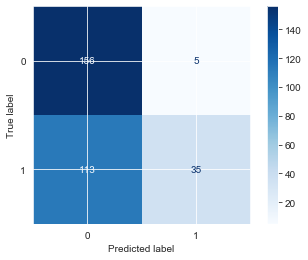

In [276]:
# plot confusion matrix for LR model that prioritises Precision

plot_confusion_matrix(gs_lr_3, X_test, y_test, cmap=plt.cm.Blues);

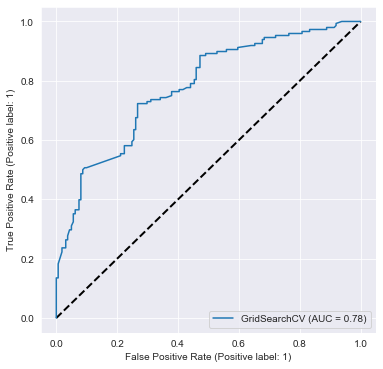

In [277]:
#plot roc curve on test set for LR model that prioritises Precision

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
plot_roc_curve(gs_lr_3, X_test, y_test, ax = ax)
plt.show()

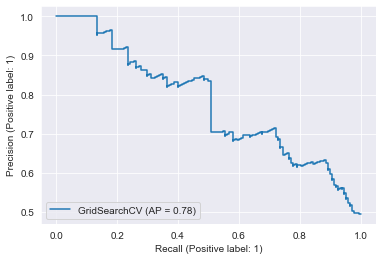

In [278]:
# precision-recall curve for LR model that prioritises Precision

plot_precision_recall_curve(gs_lr_3, X_test, y_test);

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

# STEP SIXTEEN: Assess the results from prioritising 'Precision' and explore alternatives

- In the last step we fitted a model with the aim of minimising the number of False Positives.
- The upside to this was that we only had five false positives in the test set (see confusion matrix). 
- From the perspecitive of class 1, we achieved a Precision score of 0.875
- The corresponding Recall score for class 0 was 0.969.


- This high Precision score came at a cost. The overall accuracy of the model went down to 0.618 (from 0.788). 
- There were no less than 113 False Negatives. Every False Negative is a client that we could have steered towards a high-paying job, but we didn't. It's likely that a large number of them will feel disappointed, and will take their business elsewhere. This is the trade-off that we face when we decide to keep False Positives to an absolute minimum.
- We don't have data on the relative costs of False Negatives and False Positives.


- If we found there was an equal cost to False Positives and False Negatives, we could prioritise the f1 score. We could later tweak this by using a customised f-Beta score if we found that the costs weren't exactly the same.
- In the first instance, we can fit a model that prioritises f1, and adjust later if we were to get a better sense of the relative business costs of False Positives and False Negatives.


In [279]:
# Retrain our most succesful model, this time scoring on 'f1'

X = annual_jobs[['Company', 'Location', 'Title', 'senior', 'junior', 'academic', 'machine_learning', 'analyst']]
y = annual_jobs['high_salary']
X = pd.get_dummies(X, drop_first = True)


lr = LogisticRegression(n_jobs = -2, verbose = 1, max_iter = 1000)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    stratify = y, random_state = 1)


params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs_lr_4 = GridSearchCV(estimator = lr,
                  param_grid = params,
                  cv = 5,
                  scoring = 'f1',
                  n_jobs = -2,
                  verbose = 1)

gs_lr_4.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/davidrhode/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.                nan 0.7237628         nan 0.
        nan 0.7237628         nan 0.                nan 0.7237628
        nan 0.41462736        nan 0.72428351        nan 0.70076053
        nan 0.72691154        nan 0.71023241        nan 0.73610191
        nan 0.74991064        nan 0.75659852        nan 0.7577459
        nan 0.77707317        nan 0.76554387        nan 0.78215403
        nan 0.7587979         nan 0.77548722        nan 0.75037628
        nan 0.76702934        nan 0.74551162        nan 0.76037076
        nan 0.74022231        nan 0.75894787        nan 0.74399743
        nan 0.75067012        nan 0.73926595        nan 0.74220951]
  category=UserWarning
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    2.8s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-2, verbose=1),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [281]:
# classification report for LR model that prioritises f1

predictions_2 = gs_lr_4.predict(X_test)
print(classification_report(y_test, predictions_2, digits=4))

              precision    recall  f1-score   support

           0     0.8333    0.7143    0.7692       161
           1     0.7310    0.8446    0.7837       148

    accuracy                         0.7767       309
   macro avg     0.7822    0.7794    0.7765       309
weighted avg     0.7843    0.7767    0.7762       309



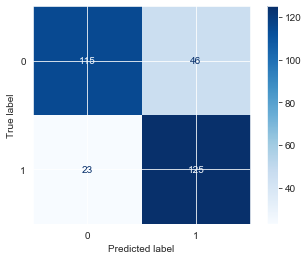

In [280]:
# plot confusion matrix for LR model that prioritises f1

plot_confusion_matrix(gs_lr_4, X_test, y_test, cmap=plt.cm.Blues);

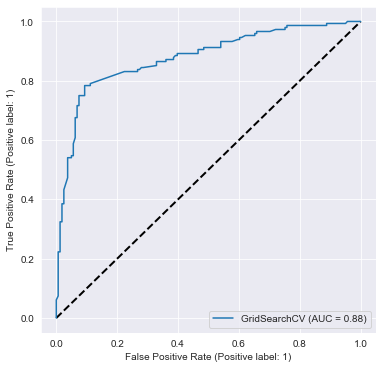

In [282]:
#plot roc curve on test set for LR model that prioritises f1

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
plot_roc_curve(gs_lr_4, X_test, y_test, ax = ax)
plt.show()

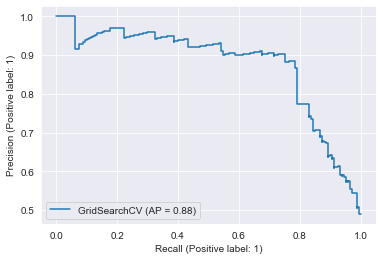

In [283]:
# precision-recall curve for LR model that prioritises f1

plot_precision_recall_curve(gs_lr_4, X_test, y_test);

# STEP 17: Conclusion

- As our two classes are quite well balanced (roughly 52-28), prioritising f1 doesn't give us a result that is very different from when we prioritised Accuracy.
- The real (but currently unknown) costs of False Negatives means that prioritising Precision might not be the best way to go in practise. 
- If we were to discover that False Positives are only slightly more damaging than False Negatives, we could deal with this by creating a weighted f-Beta to score on.


### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

## EXECUTIVE SUMMARY

The goal of this project was to compile information and use it to train a machine learning model to accurately predict the salaries of data-related jobs in the UK market.

To do this, we scraped data from the aggregator Indeed.co.uk. We conducted four main searches, looking at roles for Data Scientists, engineers in Machine Learning , Data Analysts, and experts in Artificial Intelligence. We didn’t search simply for ‘Data’, on the basis that this would return many entries for ‘Data Entry’ which would skew our results. Each search was conducted on fifteen major UK cities, and an area within 25 miles of each. For each listing, we extracted data on the job’s Company/Employer, Salary, Title, Location and Description.

Many of the results were duplicated (ie one job showing up in multiple search categories). Strangely there were also a few jobs which showed up in more than one geographic location. There was a handful of jobs from other industries (mainly law) and many job listings which either didn’t include any salary information or included temporary jobs that paid daily or weekly. Once all the unsuitable listings had been dropped, the dataset was left with just over 1500 rows. The next task was to process the salary data into a usable format, and to rationalise the location data.

We could have built a model to predict the actual salary for each job (regression), but instead were asked to split salaries into multiple categories (high vs low) and predict which would apply for each job (a ‘classification’ problem). We began the modelling process by looking only at ‘Location’ as a predictor. We tried out a couple of different models, and achieved a best accuracy score of slightly over 0.66. This means that the model correctly classified about 66.2%  of all jobs as having either ‘high’ or ‘low’ salaries. This is significantly better than the baseline score of about 52% that would have been achieved by simply guessing the majority class for all jobs (ie by guessing that they all had ‘low’ salaries).

The next step was to create some new features for the model to work with. We did this by extracting information from the ‘Company’ (whether the employer was an academic institution), and the ‘Title’ column (whether there were any indicators of seniority or junior status). Including these new features gave our models a big boost, improving the best one to an accuracy score of over 78.8%.

After this, we created new features by vectorizing the text in the ‘Description’ column. This involved mapping the words and phrases in the text to specific numbers, to look for patterns that could be used to improve our model’s predictions. Unfortunately this didn’t work, so we dropped these new features and reverted back to the previous set. Up to this point we had tried two algorithms on this dataset, LogisticRegression and RandomForest. We then tried two more types, KNearestNeighbors and XGBoost. Of the four, LogisticRegression remained the most successful, with a score of 0.788. 

Finally we were asked to look at what would happen if we needed to prioritise the avoidance of False Positives (ie if it was very important to avoid predicting a high salary when this wasn’t actually the case). We recalibrated the model with this in mind, and saw that this could be achieved at the cost of overall accuracy (because minimising False Positives would mean accepting more False Negatives).

Without data concerning the true costs of False Positives and False Negatives, it is impossible to know the best trade-off. However we looked how we could optimise for this once good cost data becomes available.




<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.